# Mentoría 'de cómo clasificar en géneros a las canciones'
## Práctico I : Análisis de features de audio

**Consideraciones:**
- Se evalúa el estilo y prolijidad del código.
- Se permite hacer trabajo extra, siempre y cuando las actividades básicas estén resueltas.

### Librerías

In [ ]:
!pip3 install spotipy
!pip3 install pandas

# Agregar las librerías extra que se utilicen en esta celda y la siguiente

### Dependencias y acceso al API

In [1]:
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '46b333d567314a89a6254b6c6b054be6'
client_secret = '9d922c3613e441518349dcf55f7d5853'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### 1) Plantear una pregunta que quieran responder con estos datos

Las preguntas pueden ser por ejemplo: 
- ¿Por qué este artista destaca dentro de su género?
- ¿Por qué no lo hace?
- ¿Por qué un género musical es más escuchado que otro?

Sin embargo, pueden usar cualquier afirmación que hayan leído en internet y que se pueda responder con los datos de este trabajo para validarla o rechazarla.

### Pregunta 1
La revista Rolling Stones en el año 2015 publico un ranking de los 50 mejores albums de Rock Progresivo de todos los tiempos
https://www.rollingstone.com/music/music-lists/50-greatest-prog-rock-albums-of-all-time-78793/yes-fragile-1971-33936/
El 1er puesto fue para Pink Floyd con ‘The Dark Side of the Moon’. ¿Cómo sera el resto de la discografia de Pink Floyd comparada con ese album?


### Pregunta 2
Por otro lado, siguiendo con el Rock Progressivo, vamos a tomar la discografía de 2 de las bandas mas trascendentes para compararlas.

### 2) Obtener datos para responder la pregunta

Para esto hay que hacer pedidos a la API para obtener una lista de canciones de sus artistas, de las cuáles se obtienen sus features de audio como en este [ejemplo](https://developer.spotify.com/console/get-audio-features-track/?id=17VP4tofJ3evJbtY8Tk1Qi) de la versión web de la API. Una vez obtenidos los datos, seleccionar un subconjunto de 5 o 6 features de audio y agrupar los datos en un [DataFrame de pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

**Recomendación** : Usar un dataframe para su artista y otro para la competencia si es que eligierone esa opción, les va a ahorrar tiempo.

**Aclaración** : Si plantearon una pregunta que no requiera los datos de la consigna, obtengan esos datos.

In [3]:
def create_dataframe_for_artist(artist_uri):
    dic_features = sp.audio_features('spotify:track:480dDrqG7LO6qDaphHeXlM')
    my_features = list(dic_features[0])+['popularity']
    results = sp.artist_albums(artist_uri, album_type='album')
    albums = results['items']
    while results['next']:
        results = sp.next(results)
        albums.extend(results['items'])
    #df = pd.DataFrame(columns=dic_features[0].keys())
    df = pd.DataFrame(columns=my_features)
    print("Found " + str(len(albums)) + " albums.")
    i=0
    for album in albums:
        result_tracks = sp.album_tracks(album['uri'])
        i+=1
        for idx, track in enumerate(result_tracks['items']):
            my_row = sp.audio_features(track['uri'])[0]
            my_row['popularity'] = sp.track(track['uri'])['popularity']
            df = df.append(my_row, ignore_index=True)
        print(str(i) + ' de ' + str(len(albums)) + '\r', end='')
    return df

#### Vamos por los datos para la pregunta 1

In [4]:
# Discografia de Pink Floyd - solo albumes de estudio
# The Piper at the Gates of Dawn
# A Saucerful of Secrets
# More
# Ummagumma
# Atom Heart Mother
# Meddle
# Obscured by Clouds
# The Dark Side of the Moon
# Wish You Were Here
# Animals
# The Wall
# The Final Cut
# A Momentary Lapse of Reason
# The Division Bell
# The Endless River
discography_albums = ['spotify:album:2Se4ZylF9NkFGD92yv1aZC', 'spotify:album:2vnJKtGjZXRUg0mYPZ3HGH', 
                      'spotify:album:6AccmjV8Q5cEUZ2tvS8s6c', 'spotify:album:3IPhWIXHOAhS2npnq6FiCG',
                      'spotify:album:2cUpAOlQjV5uSjkWj5bEQY', 'spotify:album:468ZwCchVtzEbt9BHmXopb',
                      'spotify:album:00BBpx0gG4KfQtxSJBPKUZ', 'spotify:album:0bCAjiUamIFqKJsekOYuRw',
                      'spotify:album:3b4E89rxzZQ9zkhgKpj8N4', 'spotify:album:5Dbax7G8SWrP9xyzkOvy2F',
                      'spotify:album:1yMenUMOx7BpfTDuVQs99y', 'spotify:album:4xODvcpjOOgu4oKWL0sCte',
                      'spotify:album:5F0IQXuHfTV7SBvZVnXERl', 'spotify:album:0yU7VItpGPmPcvKmwLg0JT']

In [5]:
# Pink Floyd, ‘The Dark Side of the Moon’ album
dark_side_album = ['spotify:album:4LH4d3cOWNNsVw41Gqt2kv']

In [6]:
def create_data_for_albums(albums_list):
    dic_features = sp.audio_features('spotify:track:480dDrqG7LO6qDaphHeXlM')
    my_features = list(dic_features[0])+['track_name', 'track_popularity', 'album_name', 'release_date', 'album_popularity']
    df10 = pd.DataFrame(columns=my_features)
    i = 0
    for uri in albums_list:
        my_album = sp.album(uri)
        result_tracks = sp.album_tracks(uri)
        i+=1
        for idx, track in enumerate(result_tracks['items']):
            my_row = sp.audio_features(track['uri'])[0]
            my_track = sp.track(track['uri'])
            my_row['track_name'] = my_track['name']
            my_row['track_popularity'] = my_track['popularity']
            my_row['album_name'] = my_album['name']
            my_row['release_date'] = my_album['release_date']
            my_row['album_popularity'] = my_album['popularity']
            df10 = df10.append(my_row, ignore_index=True)
        print(str(i) + ' de ' + str(len(albums_list)) + '\r', end='')
    return df10

In [7]:
#Dataframe para la discografia de Pink Floyd (solo albumes de estudio)
df_pink_floyd = create_data_for_albums(discography_albums)

In [8]:
#Dataframe para el album "Dark Side of the Moon" de  Pink Floyd
df_dark_side_moon = create_data_for_albums(dark_side_album)

In [9]:
#Borramos features que no se utilizaran
df_pink_floyd.drop(columns=['track_href', 'analysis_url', 'type'], inplace=True)
df_dark_side_moon.drop(columns=['track_href', 'analysis_url', 'type'], inplace=True)

In [10]:
df_total = pd.concat([df_pink_floyd, df_dark_side_moon])

In [11]:
df_total['album_popularity'] = df_total['album_popularity'].astype(int)

In [12]:
df_total['mode'] = df_total['mode'].astype(int)

In [13]:
df_total.groupby(["album_name"]).mean()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,album_popularity
album_name,,,,,,,,,,,
A Momentary Lapse of Reason,0.359000,0.405873,-15.259091,0.909091,0.046764,0.331754,0.166890,0.170400,0.218164,110.711727,57.0
A Saucerful of Secrets,0.251714,0.559000,-10.794571,0.714286,0.067114,0.411286,0.475287,0.144629,0.267457,113.301571,51.0
Animals,0.456000,0.422000,-15.204400,0.400000,0.064960,0.159800,0.195967,0.379840,0.281920,126.224800,62.0
Atom Heart Mother,0.349400,0.244600,-16.752400,0.400000,0.036280,0.582600,0.557000,0.230460,0.200780,124.717800,52.0
Meddle,0.440500,0.298483,-16.964333,0.833333,0.041117,0.327018,0.278393,0.224183,0.307500,119.617167,61.0
More,0.382462,0.356477,-17.622231,0.615385,0.058592,0.564831,0.538418,0.109346,0.241931,125.934846,51.0
Obscured by Clouds,0.457900,0.354400,-14.113700,0.800000,0.036040,0.214204,0.272626,0.099590,0.253280,124.911000,53.0
The Dark Side of the Moon,0.382700,0.400860,-15.698600,0.900000,0.060020,0.390780,0.594729,0.237680,0.271920,119.883800,77.0
The Division Bell,0.424273,0.438864,-13.284545,0.818182,0.033800,0.328545,0.163189,0.263982,0.222091,100.580273,65.0


#### Vamos por los datos para la pregunta 2

In [14]:
ARTIST_ONE = 'Yes'
ARTIST_TWO = 'Pink Floyd'
results = sp.search(q=ARTIST_ONE, type='artist', limit=1)
artist_one_uri = results['artists']['items'][0]['uri']
print("\nGetting data for artist " + ARTIST_ONE + " with URI " + artist_one_uri)
df_artist_one = create_dataframe_for_artist(artist_one_uri)
df_artist_one.to_csv(ARTIST_ONE+'.csv', index=False)
#
results = sp.search(q=ARTIST_TWO, type='artist', limit=1)
artist_two_uri = results['artists']['items'][0]['uri']
print("\nGetting data for artist " + ARTIST_TWO + " with URI " + artist_two_uri)
df_artist_two = create_dataframe_for_artist(artist_two_uri)
df_artist_two.to_csv(ARTIST_TWO+'.csv', index=False)


Getting data for artist Yes with URI spotify:artist:7AC976RDJzL2asmZuz7qil
Found 71 albums.
71 de 71
Getting data for artist Pink Floyd with URI spotify:artist:0k17h0D3J5VfsdmQ1iZtE9
Found 39 albums.


### 3) Hacer un gráfico de estilo [radar chart](https://en.wikipedia.org/wiki/Radar_chart)  comparando a su artista o banda con 'la competencia'
En esta parte tienen que hacer los gráficos tomando como parámetros las features de audio que eligieron. Pueden usar la librería que quieran para hacer los gráficos.

**Recomendaciones** : 
- Hacer ambos gráficos en una misma figura.
- Antes de graficar, obtener los valores medios o medianos para los valores de las features. 
- Chequear los rangos de valores para cada feature antes de hacer los gráficos.

**Aclaración**: pueden usar otro tipo de gráfico si lo consideran particularmente útil para resolver su pregunta.

In [15]:
def show_radar_chart(df1, label1, df2, label2, features):
    stats1=df1[features].mean().values
    stats2=df2[features].mean().values
    angles=np.linspace(0, 2*np.pi, len(features), endpoint=False)
    # close the plot
    stats1=np.concatenate((stats1,[stats1[0]]))
    stats2=np.concatenate((stats2,[stats2[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    #
    fig=plt.figure()
    ax = fig.add_subplot(polar=True)
    ax.plot(angles, stats1, color='green',linewidth=2, label=label1)
    ax.fill(angles, stats1, color='green',alpha=0.25)

    ax.plot(angles, stats2, color='blue',linewidth=2, label=label2)
    ax.fill(angles, stats2, color='blue',alpha=0.25)

    ax.set_thetagrids(angles * 180/np.pi, features)
    fig.suptitle(label1 + '\nvs\n' + label2, x=0.55, y=1.8,fontsize=16, fontweight='bold')
    fig.subplots_adjust(top=1.85)
    ax.legend(bbox_to_anchor=(1.5, 1.0))
    ax.grid(True)

### 4) Escribir un informe

Este informe tiene que describir qué datos que obtuvieron, el volumen de estos (# de canciones del artista, # de canciones de la competencia, etc), una explicación de cómo estos se relacionan con la pregunta planteada, cómo ayudan a responderla y los resultados que obtuvieron. Usar la celda de abajo con formato markdown.

### Pregunta 1
La revista Rolling Stones en el año 2015 publico un ranking de los 50 mejores albums de Rock Progresivo de todos los tiempos
https://www.rollingstone.com/music/music-lists/50-greatest-prog-rock-albums-of-all-time-78793/yes-fragile-1971-33936/
El 1er puesto fue para Pink Floyd con ‘The Dark Side of the Moon’. ¿Cómo sera el resto de la discografia de Pink Floyd comparada con ese album?

Se comenzo armando el dataset para incluir los tracks de cada uno de los albumes de estudio (***df_pink_floyd***), como se muestra a continuacion el dataset contiene 160 tracks, donde se incluyeron los audio features de la API, features del track como  *track_name, track_popularity*, y features del album como *album_name, album_popularity* y *release_date*

In [16]:
df_pink_floyd.describe(include="all")

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,duration_ms,time_signature,track_name,track_popularity,album_name,release_date,album_popularity
count,160.000000,160.000000,160.0,160.000000,160.0,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160,160,160.0,160.0,160,160.0,160,160,160.0
unique,NaN,NaN,12.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,160,160,160.0,4.0,160,41.0,14,14,12.0
top,NaN,NaN,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7I5jWjlfKbowYoDmeWEdND,spotify:track:1057KuzIH4fWCyI5Gb5kX2,425947.0,4.0,Shine On You Crazy Diamond (Pts. 6-9),36.0,The Wall,1979-11-30,79.0
freq,NaN,NaN,34.0,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1.0,131.0,1,11.0,26,26,26.0
mean,0.385252,0.364389,NaN,-15.843737,NaN,0.056089,0.457030,0.370181,0.245800,0.238374,115.998100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.153916,0.215096,NaN,4.982160,NaN,0.078256,0.303366,0.364069,0.228892,0.175885,31.226205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.097400,0.011800,NaN,-35.898000,NaN,0.024800,0.000038,0.000000,0.026100,0.029100,34.717000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.267500,0.197000,NaN,-18.962500,NaN,0.033175,0.187750,0.003353,0.098700,0.096175,91.164750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.371000,0.341000,NaN,-14.713500,NaN,0.039500,0.428000,0.308000,0.127500,0.193500,116.720000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.504000,0.495250,NaN,-12.255500,NaN,0.049600,0.712750,0.748750,0.325750,0.335750,133.465250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Y por otro lado se armó el dataset por separado del album "Dark Side of the Moon" (***df_dark_side_moon***), que contiene 10 tracks

In [17]:
df_dark_side_moon.describe(include="all")

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,duration_ms,time_signature,track_name,track_popularity,album_name,release_date,album_popularity
count,10.000000,10.000000,10.0,10.000000,10.0,10.000000,10.000000,10.000000,10.00000,10.00000,10.000000,10,10,10.0,10.0,10,10.0,10,10,10.0
unique,NaN,NaN,8.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,10,10,10.0,2.0,10,6.0,1,1,1.0
top,NaN,NaN,9.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3TO7bbrUKrOSPGRTB5MeCz,spotify:track:2TjdnqlpwOjhijHCwHCP2d,169535.0,4.0,On the Run,61.0,The Dark Side of the Moon,1973-03-01,77.0
freq,NaN,NaN,2.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1.0,9.0,1,4.0,10,10,10.0
mean,0.382700,0.400860,NaN,-15.698600,NaN,0.060020,0.390780,0.594729,0.23768,0.27192,119.883800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.095427,0.201321,NaN,6.907667,NaN,0.039134,0.304325,0.361298,0.18515,0.22397,30.213644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.275000,0.019600,NaN,-33.350000,NaN,0.030200,0.024100,0.002010,0.06860,0.03120,68.102000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.330500,0.274250,NaN,-14.988500,NaN,0.034625,0.103700,0.391500,0.10500,0.13550,117.167000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.358500,0.427500,NaN,-13.608000,NaN,0.038200,0.376500,0.733500,0.16050,0.19400,122.255000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.420250,0.556500,NaN,-11.988000,NaN,0.079375,0.617750,0.886250,0.34175,0.33150,132.221000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Veamos cómo es la distribucion de los audio features en ambos datasets

<Figure size 1080x1080 with 0 Axes>

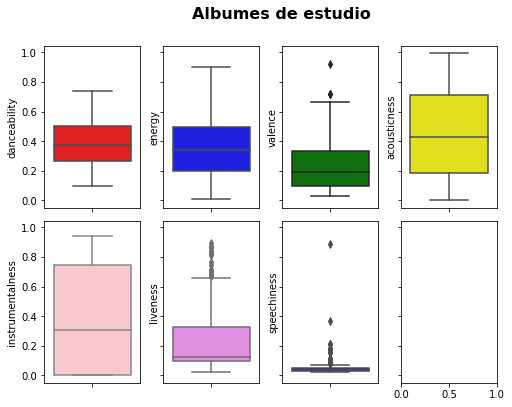

In [18]:
plt.figure(figsize=(15, 15))
fig, ax =plt.subplots(2,4,constrained_layout=True, figsize=(7,5),sharey=True)
fig.suptitle("Albumes de estudio", x=0.55, y=1.1,fontsize=16, fontweight='bold')
sns.boxplot(data=df_total[df_total['album_name'] != "The Dark Side of the Moon"], y="danceability", ax=ax[0,0], color="red")
sns.boxplot(data=df_total[df_total['album_name'] != "The Dark Side of the Moon"], y="energy", ax=ax[0,1], color="blue")
sns.boxplot(data=df_total[df_total['album_name'] != "The Dark Side of the Moon"], y="valence", ax=ax[0,2], color="green")
sns.boxplot(data=df_total[df_total['album_name'] != "The Dark Side of the Moon"], y="acousticness", ax=ax[0,3], color="yellow")
sns.boxplot(data=df_total[df_total['album_name'] != "The Dark Side of the Moon"], y="instrumentalness", ax=ax[1,0], color="pink")
sns.boxplot(data=df_total[df_total['album_name'] != "The Dark Side of the Moon"], y="liveness", ax=ax[1,1], color="violet")
sns.boxplot(data=df_total[df_total['album_name'] != "The Dark Side of the Moon"], y="speechiness", ax=ax[1,2], color="blue")

<Figure size 1080x1080 with 0 Axes>

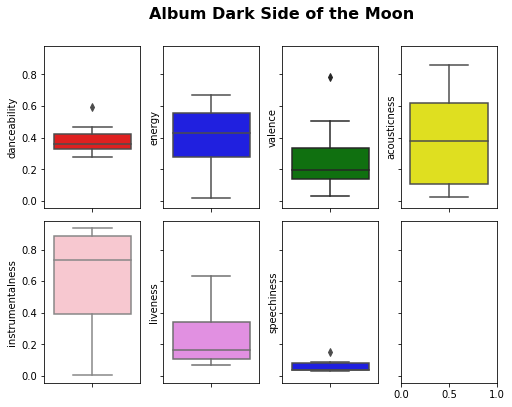

In [19]:
plt.figure(figsize=(15, 15))
fig, ax =plt.subplots(2,4,constrained_layout=True, figsize=(7,5),sharey=True)
fig.suptitle("Album Dark Side of the Moon", x=0.55, y=1.1,fontsize=16, fontweight='bold')
sns.boxplot(data=df_total[df_total['album_name'] == "The Dark Side of the Moon"], y="danceability", ax=ax[0,0], color="red")
sns.boxplot(data=df_total[df_total['album_name'] == "The Dark Side of the Moon"], y="energy", ax=ax[0,1], color="blue")
sns.boxplot(data=df_total[df_total['album_name'] == "The Dark Side of the Moon"], y="valence", ax=ax[0,2], color="green")
sns.boxplot(data=df_total[df_total['album_name'] == "The Dark Side of the Moon"], y="acousticness", ax=ax[0,3], color="yellow")
sns.boxplot(data=df_total[df_total['album_name'] == "The Dark Side of the Moon"], y="instrumentalness", ax=ax[1,0], color="pink")
sns.boxplot(data=df_total[df_total['album_name'] == "The Dark Side of the Moon"], y="liveness", ax=ax[1,1], color="violet")
sns.boxplot(data=df_total[df_total['album_name'] == "The Dark Side of the Moon"], y="speechiness", ax=ax[1,2], color="blue")

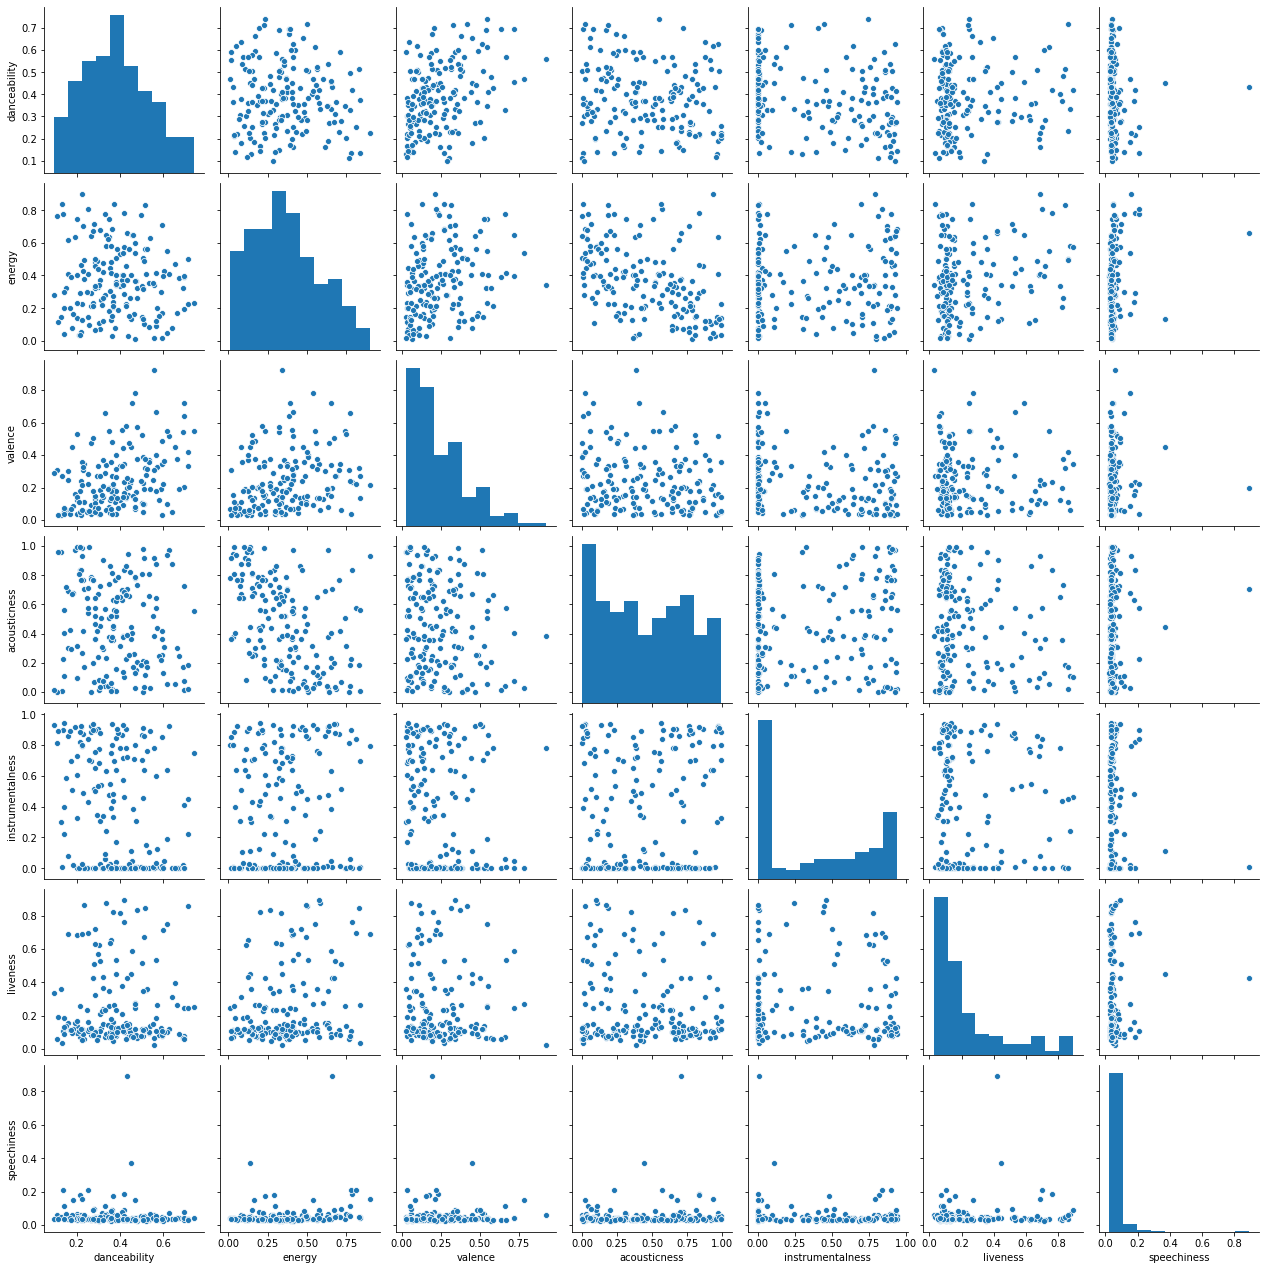

In [20]:
sns.pairplot(df_total[['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']])

Los features *danceability*, *energy*, *valence*, *liveness* y *speechiness* tienden a una distribucion normal con baja dispersion de los datos (baja desviacion std), mientras que los features *acousticness* y *instrumentalness* presentan una dispersion mas alta de los datos

Veamos a continuacion con el radar chart cómo se confrontan los audio features 

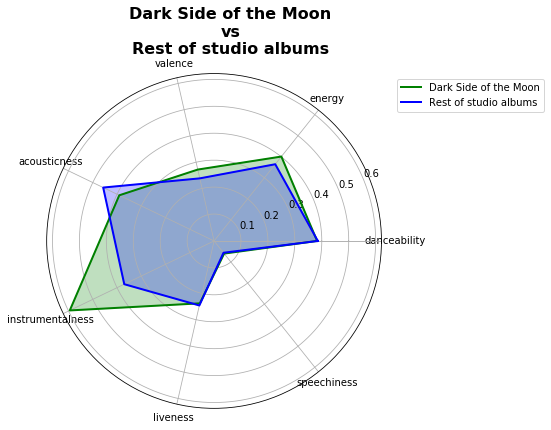

In [21]:
features=np.array(['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'speechiness'])
show_radar_chart(df_dark_side_moon,'Dark Side of the Moon',df_pink_floyd, 'Rest of studio albums',features)

En el radar chart se puede observar claramente cómo se destaca el modo instrumental en el album *Dark Side of the Moon* respecto al resto de la discografía. A su vez se muestra un pequeño aumento en *valence* y *energy*

En general en música las composiciones basadas en escalas mayores **(mode = 1)** transmiten sensaciones mas alegres, positivas, optimistas, con mas energia. Mientras que las compuestas en escalas menores **(mode = 0)** inspiran mas sentimientos de tristeza, melancolia, menos energicas y mas tranquilas. En el album *Dark Side of the Moon* el 90% de los tracks estan compuestos en escalas mayores, mientras que en el resto de la discografía solo el 70% de los tracks figuran en escalas mayores. ¿Tendrá esto que ver con las diferencias en *valence* y *energy*?

In [22]:
df_dark_side_moon["mode"].value_counts() # 90% en escalas mayores para Dark Side of the Moon

1    9
0    1
Name: mode, dtype: int64

In [23]:
df_pink_floyd["mode"].value_counts() # 70% en escalas mayores para el resto de la discografia

1    113
0     47
Name: mode, dtype: int64

Veamos la correlacion entre los features.
En particular se observa que:
- practicamente no existe relacion entre *energy* y *mode* (-0.0039) y entre *valence* y *mode* (0.1), parecen mas bien independientes
- existe cierta relacion directa entre *valence* y *danceability* lo cual tiene sentido
- existe cierta relacion indirecta entre *acousticness* y *energy*, lo cual tiene sentido


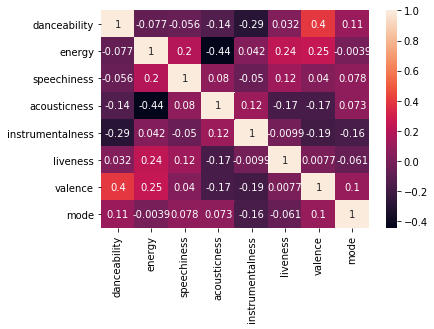

In [24]:
sns.heatmap(df_total[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'mode']].corr(), annot=True)

En cuanto a la **popularidad**, ¿cómo estan rankeados los albumes?

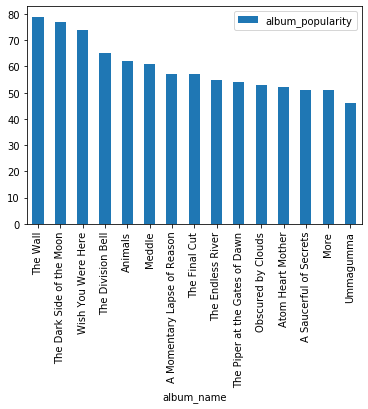

In [25]:
#Popularity para cada album
df_total.groupby(["album_name"]).mean()[['album_popularity']].sort_values('album_popularity', ascending=False).plot(kind = 'bar')

*The Dark Side of the Moon* parece haber sido ligeramente superado por el album *The Wall* (*The Wall* fue un inmenso éxito comercial, llegando al número uno de listas en numerosos países y convirtiéndose en uno de los discos más vendidos de la década del 80, el álbum doble más vendido en la historia y uno de los más vendidos de todos los tiempos, con un total de 33 millones de copias vendidas a nivel mundial, de las cuales 11.5 millones de copias fueron vendidas solo en los EE. UU., en donde debido a su naturaleza como un álbum doble, está certificado como veintitrés veces disco de platino)

### Pregunta 2
Por otro lado, siguiendo con el Rock Progressivo, vamos a tomar la discografía de 2 de las bandas mas trascendentes para compararlas. En este caso tomamos a la banda **Yes** para compararla con **Pink Floyd**

Para el armado de los datasets se busco toda la discografía que entrega la API de Spotify para cada banda.

El dataset para la banda **Yes** se presenta a continuacion con 757 tracks

In [26]:
df_artist_one.describe(include="all")

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity
count,757.000000,757.000000,757.0,757.000000,757.0,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757,757,757,757,757,757.0,757.0,757.0
unique,NaN,NaN,12.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1,757,757,757,757,623.0,4.0,54.0
top,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,audio_features,590fRm6HyuDLyBNBD2fXqJ,spotify:track:72J2ga2ueFAj8JtfrkyZnR,https://api.spotify.com/v1/tracks/5IbqTyX3lI5s...,https://api.spotify.com/v1/audio-analysis/6Nwh...,482000.0,4.0,6.0
freq,NaN,NaN,169.0,NaN,551.0,NaN,NaN,NaN,NaN,NaN,NaN,757,1,1,1,1,3.0,597.0,53.0
mean,0.371659,0.611884,NaN,-10.508855,NaN,0.057820,0.226021,0.121821,0.488697,0.376361,119.553959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.132421,0.215724,NaN,4.101037,NaN,0.044157,0.258219,0.263029,0.354904,0.193477,29.381607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.075500,0.050300,NaN,-27.176000,NaN,0.024700,0.000006,0.000000,0.032100,0.019600,45.116000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.277000,0.458000,NaN,-12.926000,NaN,0.034900,0.033300,0.000038,0.131000,0.225000,91.634000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.353000,0.621000,NaN,-10.230000,NaN,0.045300,0.110000,0.001170,0.381000,0.363000,124.741000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.446000,0.791000,NaN,-7.546000,NaN,0.064500,0.333000,0.042200,0.892000,0.490000,139.537000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Y a continuacion el dataset para la banda **Pink Floyd** con 545 tracks

In [27]:
df_artist_two.describe(include="all")

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity
count,545.000000,545.000000,545.0,545.000000,545.0,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.0,545.0,545.0
unique,NaN,NaN,12.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1,545,545,545,545,296.0,4.0,58.0
top,NaN,NaN,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,audio_features,5kLg9cdm7LayfkyaxVZKdD,spotify:track:6rhZCxXZbHQt3aKSFGsrSM,https://api.spotify.com/v1/tracks/4cnUK3kuYM1n...,https://api.spotify.com/v1/audio-analysis/1ecY...,34573.0,4.0,34.0
freq,NaN,NaN,121.0,NaN,379.0,NaN,NaN,NaN,NaN,NaN,NaN,545,1,1,1,1,4.0,454.0,30.0
mean,0.379237,0.421883,NaN,-15.112651,NaN,0.055201,0.354864,0.311394,0.380080,0.243224,115.484255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.143744,0.220388,NaN,4.680163,NaN,0.064772,0.296063,0.352326,0.327125,0.176494,30.299776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.063100,0.011800,NaN,-35.898000,NaN,0.024800,0.000038,0.000000,0.026100,0.029100,34.717000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.275000,0.262000,NaN,-16.862000,NaN,0.033200,0.084700,0.002180,0.107000,0.112000,94.018000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.364000,0.404000,NaN,-13.852000,NaN,0.039800,0.287000,0.077500,0.207000,0.194000,116.974000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.471000,0.585000,NaN,-11.938000,NaN,0.051800,0.599000,0.682000,0.699000,0.342000,132.668000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


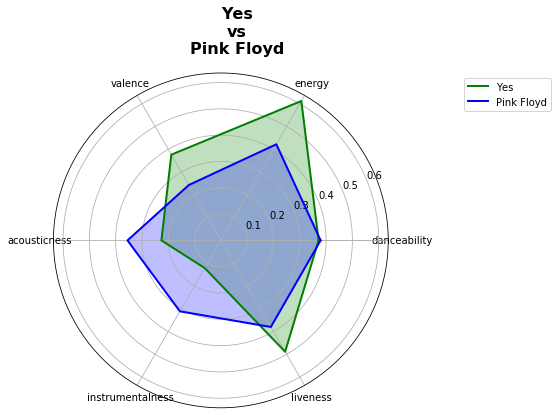

In [28]:
features=np.array(['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness'])
show_radar_chart(df_artist_one,'Yes',df_artist_two, 'Pink Floyd',features)

Se observa la marcada diferencia en los features de *valence*, *energy* y *acousticness*, producto del estilo de la banda *Yes* que se caracteriza por el uso de mas recursos electrónicos como sintetizadores, baterias electronicas, y melodías mas rítmicas